# Exploratory Data Analysis

In [3]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import Dataset
order_df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/order.csv")

In [7]:
#Cek Jumlah Baris dan Kolom dari Dataset
order_df.shape

(49999, 12)

## Cek Summary Data

In [8]:
print(order_df.describe)

<bound method NDFrame.describe of                                order_id  quantity  \
0      2e7a8482f6fb09756ca50c10d7bfc047         2   
1      2e7a8482f6fb09756ca50c10d7bfc047         1   
2      e5fa5a7210941f7d56d0208e4e071d35         1   
3      3b697a20d9e427646d92567910af6d57         1   
4      71303d7e93b399f5bcd537d124c0bcfa         1   
...                                 ...       ...   
49994  ec88157ad03aa203c3fdfe7bace5ab6b         1   
49995  ed60085e92e2aa3debf49159deb34da7         1   
49996  ed98c37d860890f940e2acd83629fdd1         2   
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575         1   

                             product_id    price  \
0      f293394c72c9b5fafd7023301fc21fc2  1489000   
1      c1488892604e4ba5cff5b4eb4d595400  1756000   
2      f3c2d01a84c947b078e32bbef0718962  1707000   
3      3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4      d2998d7ced12f83f9b832f33cf6507b6  3833000   
...              

## Cek Median Tiap Kolom dari Dataset

In [9]:
# Median median dari total pembelian konsumen per transaksi kolom price
print(order_df.loc[:, 'price'].median)

<bound method Series.median of 0        1489000
1        1756000
2        1707000
3        3071000
4        3833000
          ...   
49994    3077000
49995    1277000
49996     486000
49997     830000
49998     215000
Name: price, Length: 49999, dtype: int64>


## Cek History Data

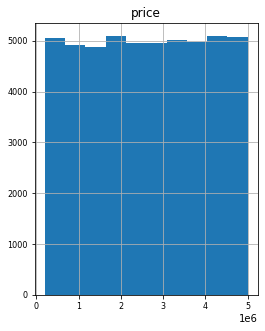

In [28]:
# plot histogram kolom: price
order_df[['price']].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()  # Untuk menampilkan histogram plot

## Mengetahui Standar Deviasi dan Varians

In [15]:
# Standar variasi kolom product_weight_gram
print(order_df.loc[:, 'product_weight_gram'].std())
# Varians kolom product_weight_gram
print(order_df.loc[:, 'product_weight_gram'].var())

3929.896875372737
15444089.451064402


## Deteksi Outlier
Pada umumnya, outliers dapat ditentukan dengan metrik IQR (interquartile range).<br>
Rumus dasar dari IQR: Q3 - Q1. Dan data suatu observasi dapat dikatakan outliers jika memenuhi kedua syarat dibawah ini:<br>
- Data < Q1 - 1.5 * IQR
- Data > Q3 + 1.5 * IQR


In [18]:
# Hitung quartile 1
Q1 = order_df[['product_weight_gram']].quantile(0.25)
# Hitung quartile 3
Q3 = order_df[['product_weight_gram']].quantile(0.75)
# Hitung inter quartile range dan cetak ke console
IQR = Q3 - Q1
print(IQR)

product_weight_gram    1550.0
dtype: float64


In [28]:
print((order_df < (Q1 - 1.5*IQR)) | (order_df > (Q1 + 1.5*IQR)))

       customer_id  freight_value  order_id  order_status  payment_type  \
0            False          False     False         False         False   
1            False          False     False         False         False   
2            False          False     False         False         False   
3            False          False     False         False         False   
4            False          False     False         False         False   
...            ...            ...       ...           ...           ...   
49994        False          False     False         False         False   
49995        False          False     False         False         False   
49996        False          False     False         False         False   
49997        False          False     False         False         False   
49998        False          False     False         False         False   

       price  product_category_name  product_id  product_weight_gram  \
0      False               

## Mengganti Nama dari Sebuah Kolom
Mengganti nama kolom pada Pandas dapat dilakukan dengan 2 cara yaitu: <br>
dengan menggunakan nama kolom atau Menggunakan indeks kolom

In [29]:
# Ganti nama kolom freight_value menjadi shipping_cost
order_df.rename(columns={'freight_value': 'shipping_cost'}, inplace=True)
print(order_df)

                               order_id  quantity  \
0      2e7a8482f6fb09756ca50c10d7bfc047         2   
1      2e7a8482f6fb09756ca50c10d7bfc047         1   
2      e5fa5a7210941f7d56d0208e4e071d35         1   
3      3b697a20d9e427646d92567910af6d57         1   
4      71303d7e93b399f5bcd537d124c0bcfa         1   
...                                 ...       ...   
49994  ec88157ad03aa203c3fdfe7bace5ab6b         1   
49995  ed60085e92e2aa3debf49159deb34da7         1   
49996  ed98c37d860890f940e2acd83629fdd1         2   
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575         1   

                             product_id    price  \
0      f293394c72c9b5fafd7023301fc21fc2  1489000   
1      c1488892604e4ba5cff5b4eb4d595400  1756000   
2      f3c2d01a84c947b078e32bbef0718962  1707000   
3      3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4      d2998d7ced12f83f9b832f33cf6507b6  3833000   
...                                 ...      ...   

In [30]:
# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


In [31]:
# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="price", ascending=False)
print(sort_harga.head(10))

                               order_id  quantity  \
37085  d7b2d3b902441cf3dd12cd125533217d         1   
41958  2711089c7fec59d4dc8483e3c6a12fa3         1   
3976   f343624eab419250ad81f1ce6be22c93         1   
21072  c8947a583ab9791a5a9d02384cb84302         1   
47074  f6134169ca6f0cdfbe6458ebb5731613         1   
22618  a767765cf25c6fcfd8307499da9205d2         1   
5273   10bf9305aa4d5fb3382720adad789a40         1   
34883  c262a5f352a22159735734b273a4b888         1   
2006   1b01e824ff3005e8108c5112f41c219c         1   
11935  4ca6a87f196ea892c5abc4e84748fbde         1   

                             product_id    price  \
37085  35afc973633aaeb6b877ff57b2793310  5000000   
41958  7c1bd920dbdf22470b68bde975dd3ccf  5000000   
3976   777d2e438a1b645f3aec9bd57e92672c  5000000   
21072  f8cfb63e323be2e1c4172f255d61843d  5000000   
47074  2ea92fab7565c4fe9f91a5e4e1756258  5000000   
22618  48698ba0cfe847b41430fa00081b5619  5000000   
5273   209c968305b3c2ab858608fc0b21e7e0  4999000   


In [32]:
# Kembalikan kolom shipping_cost menjadi freight_value
order_df.rename(columns={'shipping_cost': 'freight_value'}, inplace=True)
print(order_df)

                               order_id  quantity  \
0      2e7a8482f6fb09756ca50c10d7bfc047         2   
1      2e7a8482f6fb09756ca50c10d7bfc047         1   
2      e5fa5a7210941f7d56d0208e4e071d35         1   
3      3b697a20d9e427646d92567910af6d57         1   
4      71303d7e93b399f5bcd537d124c0bcfa         1   
...                                 ...       ...   
49994  ec88157ad03aa203c3fdfe7bace5ab6b         1   
49995  ed60085e92e2aa3debf49159deb34da7         1   
49996  ed98c37d860890f940e2acd83629fdd1         2   
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575         1   

                             product_id    price  \
0      f293394c72c9b5fafd7023301fc21fc2  1489000   
1      c1488892604e4ba5cff5b4eb4d595400  1756000   
2      f3c2d01a84c947b078e32bbef0718962  1707000   
3      3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4      d2998d7ced12f83f9b832f33cf6507b6  3833000   
...                                 ...      ...   

## LATIHAN
Bihaqi diminta tolong untuk mengurus beberapa data penjualan dari dataset oder.csv dari dataset sebelumnya <br>
Berikut ya detailnya:<br>

1. Median price yang dibayar customer dari masing-masing metode pembayaran.
2. Tentukan metode pembayaran yang memiliki basket size (rataan median price) terbesar.
3. Ubah freight_value menjadi shipping_cost dan cari shipping_cost termahal dari data penjualan tersebut menggunakan sort.
4. Untuk product_category_name, berapa rata-rata weight produk tersebut dan standar deviasi mana yang terkecil dari weight tersebut,
5. Buat histogram quantity penjualan dari dataset tersebut untuk melihat persebaran quantity penjualan tersebut dengan bins = 5 dan figsize= (4,5)<br>
<br>
NOTE:<br>
Khusus poin 4, tolong diperhatikan lebih ya, Aksara karena hasil analisisnya akan digunakan kepala cabang dalam menyusun strategi free ongkir.

## 1.Median price yang dibayar customer dari masing-masing metode pembayaran. 
buat median dari masing2 metode pembayaran

In [46]:
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64


metode pembayaran yang memiliki basket size (rataan median price) terbesar adalah:<br>
1. Virtual Account
2. Debit Card
3. E-Wallet
4. Credit Card

## 2. Ubah freight_value menjadi shipping_cost dan mengurutkan data penjualan <br> dari nilai yang tertinggi

In [36]:
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)

                               order_id  quantity  \
23829  7d63cb1d349e7bd0ee1edcc61ea71077         1   
12011  00c9f7d4b0e87781465e562dc109f6aa         1   
10984  69013d19f8db4cd7dc9f3b5c2564a96f         1   
29722  f32c4d2b078bc5a354f4c1184522b5ff         1   
15259  c8eab0ccabe8cdfc2afce66c1c554ae2         1   
...                                 ...       ...   
2891   1d0e8770169496e47622b6cbc0d10bda         1   
36815  4bff82a994068f564e54b52b08ef4512         2   
8175   e6b1fa22555c3064f984ebeb8a88de77         1   
4034   8ac2728285fd4228f35d907768b5288a         4   
32994  0286e258217733541e80588e29c208c1         1   

                             product_id    price  \
23829  75d6b6963340c6063f7f4cfcccfe6a30  1472000   
12011  1a0d662b65b5ef08796501b064c853af  4543000   
10984  10d196ec072e2d8382c7ec9c942d7ea8  4137000   
29722  0f789be671fe3bd93cabfbb4a710f282  4802000   
15259  800f75019492a0d9ffb2483ae65b59f1  4078000   
...                                 ...      ...   

## 3. Untuk product_category_name, cari berapa  rata-rata weight produk tersebut <br> dan standar deviasi mana yang terkecil dari weight tersebut.

In [37]:
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(mean_value)
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).var()
print(std_value)

product_category_name
automotive     3799.884166
beauty         3837.474929
electronics    3839.271768
fashion        3858.885213
gadget         3955.792741
sports         4032.850044
toys           3956.814749
utilities      4150.509909
Name: product_weight_gram, dtype: float64
product_category_name
automotive     1.443912e+07
beauty         1.472621e+07
electronics    1.474001e+07
fashion        1.489100e+07
gadget         1.564830e+07
sports         1.626388e+07
toys           1.565638e+07
utilities      1.722673e+07
Name: product_weight_gram, dtype: float64


## Buat Histogram Untum mengetahui Persebaran Data 

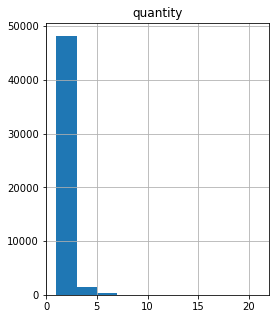

In [38]:
# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=10)
plt.show()